Back to the main [Index](index.ipynb) <a id="top"></a>

# Analyzing Lobster output files with AbiPy

This example shows how to analyze the output files
produced by [Lobster](http://schmeling.ac.rwth-aachen.de/cohp)

Use 

    abiopen.py FILE 
    
with the `--expose` or `--print` for a command line interface
and `--notebook` to generate a jupyter notebook from `FILE`.

Note: The code in this notebook requires abipy >= 0.6

## Table of Contents
[[back to top](#top)]

- [How to analyze the COHPCAR file](#How-to-analyze-the-COHPCAR-file)
- [How to analyze the DOSCAR file](#How-to-analyze-the-DOSCAR-file)
- [Analyzing all Lobster output files](#Analyzing-all-Lobster-output-files-with-LobsterAnalyzer)

Let's start by importing the basic modules needed for this tutorial.

In [1]:
# Use this at the beginning of your script so that your code will be compatible with python3
from __future__ import print_function, division, unicode_literals

import warnings 
warnings.filterwarnings("ignore")  # Ignore warnings

from abipy import abilab
abilab.enable_notebook() # This line tells AbiPy we are running inside a notebook
import abipy.data as abidata

import seaborn as sns
sns.set(context='notebook', style='darkgrid', palette='deep',
        font='sans-serif', font_scale=1, color_codes=False, rc=None)

# This line tells the notebook to show plots inside of the notebook
#%matplotlib notebook
%matplotlib ipympl
#%matplotlib widget

## How to analyze the COHPCAR file  
[[back to top](#top)]

In [2]:
# Path to one of the reference file shipped with AbiPy
import os
dirpath = os.path.join(abidata.dirpath, "refs", "lobster_gaas")
filename = os.path.join(dirpath, "GaAs_COHPCAR.lobster.gz")

# Open the COHPCAR.lobster file (same API for COOPCAR.lobster)
cohp_file = abilab.abiopen(filename)
print(cohp_file)


COHP: Number of energies: 401, from -14.035 to 6.015 (eV) with E_fermi set 0 (was 2.298)
has_partial_projections: True, nsppol: 1
Number of pairs: 2
[0] Ga@0 --> As@1
[1] As@1 --> Ga@0


To plot the COHP averaged over all atom pairs specified:

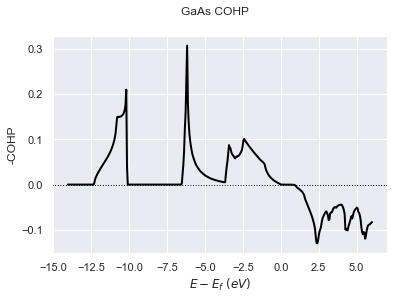

In [4]:
cohp_file.plot(title="GaAs COHP");

To plot the integrated COHP averaged over all atom pairs:

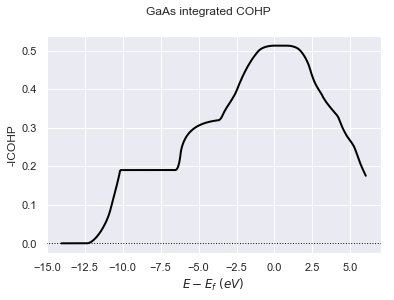

In [5]:
cohp_file.plot(what="i", title="GaAs integrated COHP");

To plot the total overlap for all sites listed in `from_site_index`

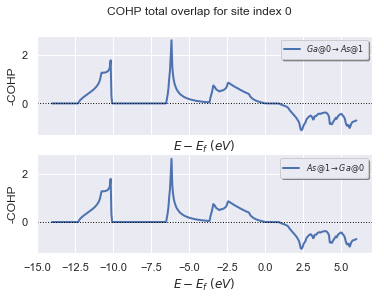

In [6]:
cohp_file.plot_site_pairs_total(from_site_index=[0, 1], title="COHP total overlap for site index 0");

To plot partial crystal orbital projections for all sites listed in `from_site_index`:

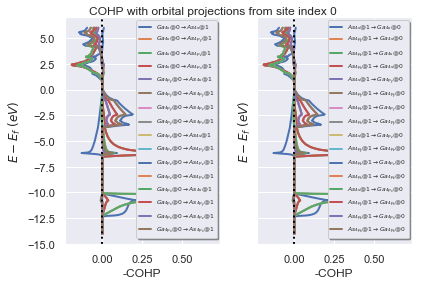

In [7]:
cohp_file.plot_site_pairs_partial(from_site_index=[0, 1], 
                                  title="COHP with orbital projections from site index 0", 
                                  fontsize=6, tight_layout=True);

In [8]:
#cohp_file.plot_average_pairs(with_site_index=[0]);

Use `abiopen` to open the MDF:

<div class="alert alert-info" role="alert">
Alternatively one can use `abiopen.py COHPCAR.lobster -nb` to generate a jupyter notebook directly from the terminal
or `abiopen.py COHPCAR.lobster -e -sns` to produce matplotlib plots automatically.
</div>

## How to analyze the ICOHPLIST file  
[[back to top](#top)]

In [9]:
# Path to one of the AbiPy file
dirpath = os.path.join(abidata.dirpath, "refs", "lobster_gaas")
filename = os.path.join(dirpath, "GaAs_ICOHPLIST.lobster.gz")

# Open the ICOHPCAR.lobster file.
icohp_file = abilab.abiopen(filename)
print(icohp_file)

Number of pairs: 2
index0  index1 type0 type1  spin  average distance n_bonds    pair
     0       1    Ga    As     0 -4.36062  2.49546    None  (0, 1)
     1       0    As    Ga     0 -4.36062  2.49546    None  (1, 0)


## How to analyze the DOSCAR file  
[[back to top](#top)]

In [10]:
dirpath = os.path.join(abidata.dirpath, "refs", "lobster_gaas")
filename = os.path.join(dirpath, "GaAs_DOSCAR.lobster.gz")

# Open the ICOHPCAR.lobster file.
doscar = abilab.abiopen(filename)
print(doscar)

Number of energies: 401, from -14.035 to 6.015 (eV) with E_fermi set to 0 (was 2.298)
nsppol: 1
Number of sites in projected DOS: 2
0 --> {4s, 4p_y, 4p_z, 4p_x}
1 --> {4s, 4p_y, 4p_z, 4p_x}


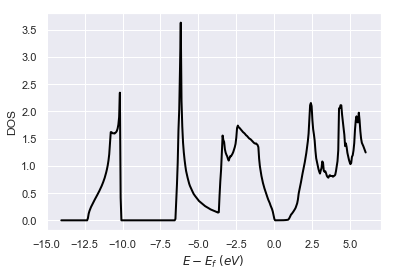

In [11]:
doscar.plot();

In [12]:
doscar.plot_pdos(site_index=[0, 1]);

AttributeError: 'LobsterDoscarFile' object has no attribute 'plot_pdos'

## Analyzing all Lobster output files with LobsterAnalyzer
[[back to top](#top)]

To analyze the converge of the optical spectra, we can use the MdfRobot.
Let's build our robot from a list of MDF.nc files:

In [13]:
#icohp.dataframe

In [14]:
#icohp.plot();

In [15]:
dirpath = os.path.join(abidata.dirpath, "refs", "lobster_gaas")

# Open the all the lobster files produced in directory dirpath
# with the (optional) prefix GaAs_
lobana = abilab.LobsterAnalyzer.from_dir(dirpath, prefix="GaAs_")
print(lobana.to_string(verbose=1))

================================= COOP File =================================
Name: GaAs_COOPCAR.lobster.gz
Directory: /Users/gmatteo/git_repos/abipy/abipy/data/refs/lobster_gaas
Size: 23.04 kb
Access Time: Sun Aug  5 21:20:39 2018
Modification Time: Sat Jul 14 00:27:22 2018
Change Time: Sat Jul 14 00:27:22 2018

COOP: Number of energies: 401, from -14.035 to 6.015 (eV) with E_fermi set 0 (was 2.298)
has_partial_projections: True, nsppol: 1
Number of pairs: 2
[0] Ga@0 --> As@1
[1] As@1 --> Ga@0

================================= COHP File =================================
Name: GaAs_COHPCAR.lobster.gz
Directory: /Users/gmatteo/git_repos/abipy/abipy/data/refs/lobster_gaas
Size: 24.06 kb
Access Time: Sun Aug  5 21:20:39 2018
Modification Time: Sat Jul 14 00:27:22 2018
Change Time: Sat Jul 14 00:27:22 2018

COHP: Number of energies: 401, from -14.035 to 6.015 (eV) with E_fermi set 0 (was 2.298)
has_partial_projections: True, nsppol: 1
Number of pairs: 2
[0] Ga@0 --> As@1
[1] As@1 --> Ga@0

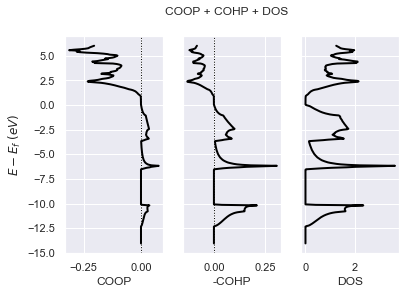

In [16]:
# Plot COOP + COHP + DOS.
lobana.plot(title="COOP + COHP + DOS");

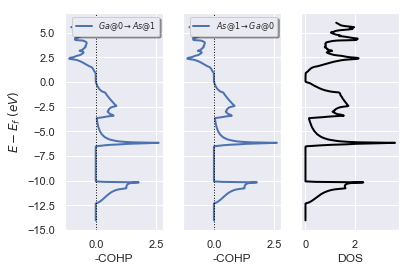

In [17]:
# Plot COHP for all sites in from_site_index and Lobster DOS.
lobana.plot_coxp_with_dos(from_site_index=[0, 1]);

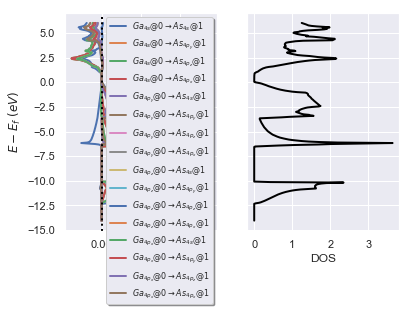

In [18]:
# Plot orbital projections.
lobana.plot_coxp_with_dos(from_site_index=[0], with_orbitals=True);

In [19]:
#lobana.plot_with_ebands(ebands="out_GSR.nc")

<div class="alert alert-info" role="alert">
For a command line interface, use: `abiview.py lobster .`.
Use the `--expose` option to generate plots automatically.
</div>

Back to the main [Index](index.ipynb)